In [1]:
# install.packages('gridExtra')

# library(rjags)
# library(coda)
# library(tidyverse)
# library(gridExtra)

In [1]:
install.packages('gridExtra')
install.packages('emdbook')
install.packages('ramify')

library(tidyverse)
library(gridExtra)
library(emdbook)
library(ramify)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependencies ‘bdsmatrix’, ‘mvtnorm’, ‘coda’, ‘bbmle’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘ramify’


The following object is m

# Ex.1

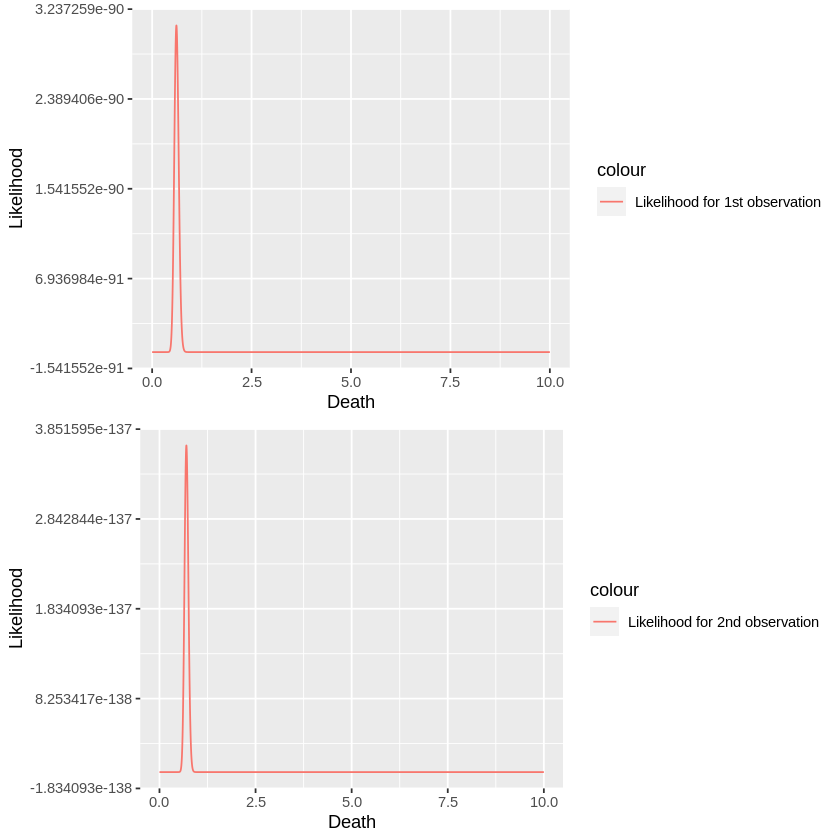

In [3]:
# two observation
n_1 <- c(rep(0, times=109), rep(1, times = 65), rep(2, times=22), rep(3, times=3), rep(4, times=1))
n_2 <- c(rep(0, times=144), rep(1, times = 91), rep(2, times=32), rep(3, times=11), rep(4, times=2))

delta.t <- 0.001
lambda_list <- seq(from=0, to=10, by=delta.t)
#likelihood for the two observation are both poisson
pois <- function(n_i, lambda_list){
            p_i_like <- 1 #rep(1, times = length(lambda_list))
            for (n in n_i){
                p_i_like <- p_i_like * dpois(x=n, lambda=lambda_list)
                }
            return(p_i_like)
            }

#compute the two likelihood separatly for the two observation
p_1_like <- pois(n_1,  lambda_list)
p_2_like <- pois(n_2,  lambda_list)


#plot
ggplot() +
geom_line(aes(lambda_list, p_1_like, color='Likelihood for 1st observation')) +
labs(x='Death', y='Likelihood') -> plot_like_1

ggplot() +
geom_line(aes(lambda_list, p_2_like, color='Likelihood for 2nd observation')) +
labs(x='Death', y='Likelihood') -> plot_like_2

grid.arrange(grobs=list(plot_like_1, plot_like_2), nrow=2)

#### (a) assuming a uniform prior, compute and plot the posterior distribution for λ, the death rate over the measurement time. Determine the posterior mean, median and variance, and compute the 95% credibility interval.

,mean,variance,lower_bound_credibility_interval,upper_bound_credibility_interval
,<dbl>,<dbl>,<dbl>,<dbl>
First obseration,0.6150000,0.003075000,0.508,0.724
Second observation,0.7035714,0.002512755,0.607,0.802


Warning message:
“Removed 9250 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 9250 rows containing missing values (`geom_line()`).”


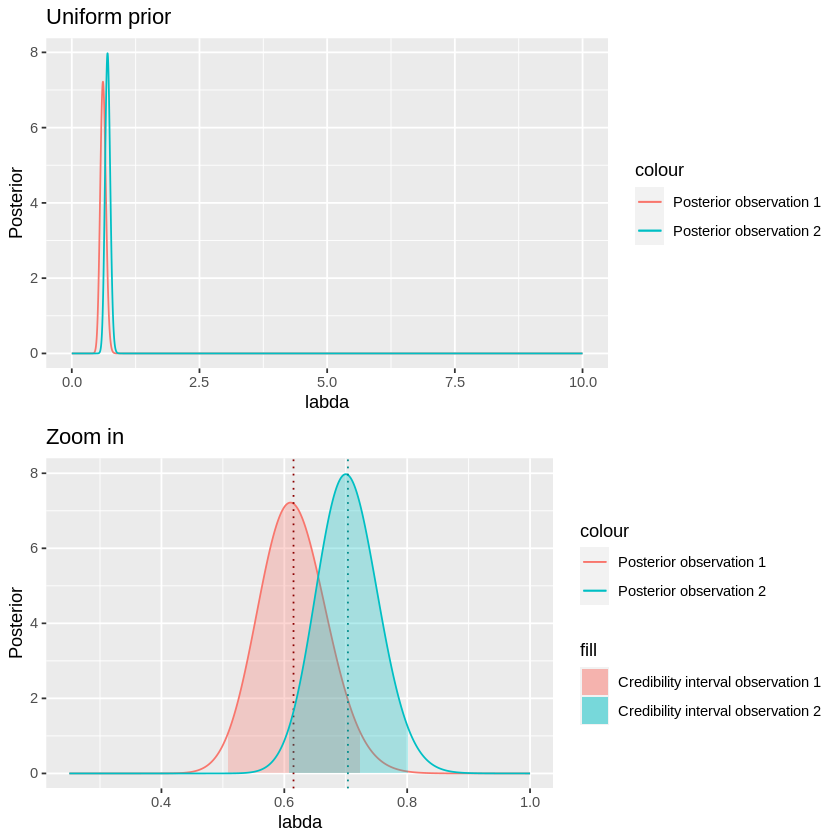

In [4]:
#posterior with uniform prior
p.post_star_unif_1 <- p_1_like * 1 #dunif(lambda_list, min = min(lambda_list), max=max(lambda_list))#non normalized posterior
p.post_unif_1 <- p.post_star_unif_1 / (sum(p.post_star_unif_1)*delta.t)
mean_unif_1 <- sum(p.post_unif_1 * lambda_list)*delta.t
variance_unif_1 <- sum(((mean_unif_1-lambda_list)^2)*p.post_unif_1)*delta.t
lower_unif_1 <- ncredint(lambda_list, p.post_unif_1, level = 0.95)[['lower']]
upper_unif_1 <- ncredint(lambda_list, p.post_unif_1, level = 0.95)[['upper']]


p.post_star_unif_2 <- p_2_like * 1 #dunif(lambda_list, min = min(lambda_list), max=max(lambda_list)) #non normalized posterior
p.post_unif_2 <- p.post_star_unif_2 / (sum(p.post_star_unif_2)*delta.t)
mean_unif_2 <- sum(p.post_unif_2 * lambda_list)*delta.t
variance_unif_2 <- sum(((mean_unif_2-lambda_list)^2)*p.post_unif_2)*delta.t
lower_unif_2 <- ncredint(lambda_list, p.post_unif_2, level = 0.95)[['lower']]
upper_unif_2 <- ncredint(lambda_list, p.post_unif_2, level = 0.95)[['upper']]


result_unif <- data.frame(
                mean = c(mean_unif_1, mean_unif_2), 
                variance = c(variance_unif_1, variance_unif_2),
                lower_bound_credibility_interval = c(lower_unif_1, lower_unif_2),
                upper_bound_credibility_interval = c(upper_unif_1, upper_unif_2),
                row.names = c('First obseration', 'Second observation')
                )
result_unif


#plot
ggplot() +
geom_line(aes(lambda_list, p.post_unif_1, color='Posterior observation 1')) +
geom_line(aes(lambda_list, p.post_unif_2, color='Posterior observation 2')) +
labs(x='labda',y ='Posterior', title='Uniform prior')-> plot_posterior_unif

ggplot() +
geom_line(aes(lambda_list, p.post_unif_1, color='Posterior observation 1')) + 
geom_area(aes(x = lambda_list[lambda_list > lower_unif_1 & lambda_list < upper_unif_1], 
              y = p.post_unif_1[lambda_list > lower_unif_1 & lambda_list < upper_unif_1],
              fill='Credibility interval observation 1'), alpha=0.3) +
geom_vline(aes(xintercept=mean_unif_1), color='darkRed', linetype='dotted')+


geom_line(aes(lambda_list, p.post_unif_2, color='Posterior observation 2')) + 
geom_area(aes(x = lambda_list[lambda_list > lower_unif_2 & lambda_list < upper_unif_2], 
              y = p.post_unif_2[lambda_list > lower_unif_2 & lambda_list < upper_unif_2],
              fill='Credibility interval observation 2'), alpha=0.3) +
geom_vline(aes(xintercept=mean_unif_2), color='darkCyan', linetype='dotted') +

labs(x='labda',y ='Posterior', title='Zoom in') +
ylim(0, 8) +
xlim(0.25, 1) -> plot_posterior_unif_zoom

grid.arrange(grobs=list(plot_posterior_unif, plot_posterior_unif_zoom))

#### (b) assuming a Jeffrey's prior, compute and plot the posterior distribution for λ, the death rate over the measurement time. Determine the posterior mean, median and variance, and compute the 95% credibility interval.

,mean,variance,lower_bound_credibility_interval,upper_bound_credibility_interval
,<dbl>,<dbl>,<dbl>,<dbl>
First obseration,0.6125000,0.003062500,0.5061,0.7211
Second observation,0.7017857,0.002506378,0.6051,0.8001


Warning message:
“Removed 9250 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 9250 rows containing missing values (`geom_line()`).”


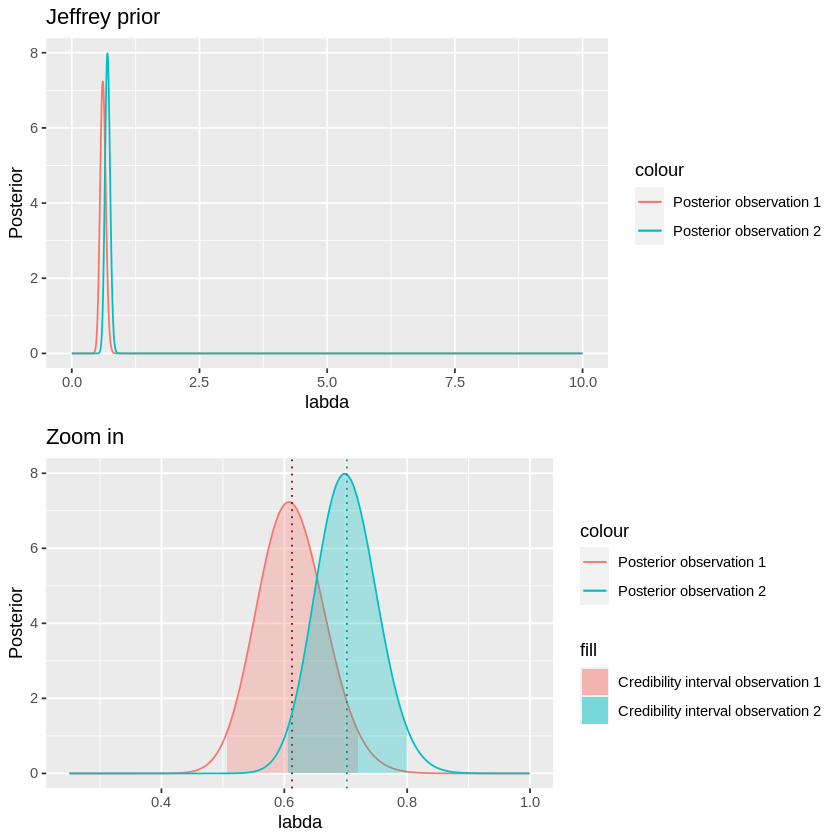

In [5]:
#posterior with Jeffrey prior
lambda_list <- seq(from=0.0001, to=10, by=delta.t)
p_1_like <- pois(n_1,  lambda_list)
p_2_like <- pois(n_2,  lambda_list)


p.post_star_Jeffrey_1 <- p_1_like * (1/sqrt(lambda_list))#non normalized posterior
p.post_Jeffrey_1 <- p.post_star_Jeffrey_1 / (sum(p.post_star_Jeffrey_1)*delta.t)
mean_Jeffrey_1 <- sum(p.post_Jeffrey_1 * lambda_list)*delta.t
variance_Jeffrey_1 <- sum(((mean_Jeffrey_1-lambda_list)^2)*p.post_Jeffrey_1)*delta.t
lower_Jeffrey_1 <- ncredint(lambda_list, p.post_Jeffrey_1, level = 0.95)[['lower']]
upper_Jeffrey_1 <- ncredint(lambda_list, p.post_Jeffrey_1, level = 0.95)[['upper']]


p.post_star_Jeffrey_2 <- p_2_like * (1/sqrt(lambda_list)) #non normalized posterior
p.post_Jeffrey_2 <- p.post_star_Jeffrey_2 / (sum(p.post_star_Jeffrey_2)*delta.t)
mean_Jeffrey_2 <- sum(p.post_Jeffrey_2 * lambda_list)*delta.t
variance_Jeffrey_2 <- sum(((mean_Jeffrey_2-lambda_list)^2)*p.post_Jeffrey_2)*delta.t
lower_Jeffrey_2 <- ncredint(lambda_list, p.post_Jeffrey_2, level = 0.95)[['lower']]
upper_Jeffrey_2 <- ncredint(lambda_list, p.post_Jeffrey_2, level = 0.95)[['upper']]


result_unif <- data.frame(
                mean = c(mean_Jeffrey_1, mean_Jeffrey_2), 
                variance = c(variance_Jeffrey_1, variance_Jeffrey_2),
                lower_bound_credibility_interval = c(lower_Jeffrey_1, lower_Jeffrey_2),
                upper_bound_credibility_interval = c(upper_Jeffrey_1, upper_Jeffrey_2),
                row.names = c('First obseration', 'Second observation')
                )
result_unif


#plot
ggplot() +
geom_line(aes(lambda_list, p.post_Jeffrey_1, color='Posterior observation 1')) +
geom_line(aes(lambda_list, p.post_Jeffrey_2, color='Posterior observation 2')) +
labs(x='labda', y ='Posterior', title='Jeffrey prior')-> plot_posterior_Jeffrey

ggplot() +
geom_line(aes(lambda_list, p.post_Jeffrey_1, color='Posterior observation 1')) + 
geom_area(aes(x = lambda_list[lambda_list > lower_Jeffrey_1 & lambda_list < upper_Jeffrey_1], 
              y = p.post_Jeffrey_1[lambda_list > lower_Jeffrey_1 & lambda_list < upper_Jeffrey_1],
              fill='Credibility interval observation 1'), alpha=0.3) +
geom_vline(aes(xintercept=mean_Jeffrey_1), color='darkRed', linetype='dotted')+


geom_line(aes(lambda_list, p.post_Jeffrey_2, color='Posterior observation 2')) + 
geom_area(aes(x = lambda_list[lambda_list > lower_Jeffrey_2 & lambda_list < upper_Jeffrey_2], 
              y = p.post_Jeffrey_2[lambda_list > lower_Jeffrey_2 & lambda_list < upper_Jeffrey_2],
              fill='Credibility interval observation 2'), alpha=0.3) +
geom_vline(aes(xintercept=mean_Jeffrey_2), color='darkCyan', linetype='dotted') +

labs(x='labda',y ='Posterior', title='Zoom in') +
ylim(0, 8) +
xlim(0.25, 1) -> plot_posterior_Jeffrey_zoom

grid.arrange(grobs=list(plot_posterior_Jeffrey, plot_posterior_Jeffrey_zoom))

# Ex.2

solve Exercise 1 with a Markov Chain Monte Carlo. Build your own MCMC, using the functions
introduced during lectures, or using a MCM library like JAGS.

#### (a) assuming a uniform prior, compute and plot the posterior distribution for λ, the death rate over the measurement time. Determine the posterior mean, median and variance, and compute the 95% credibility interval.

In [274]:
#data
data_1 <- NULL
data_1$X <- n_1

data_2 <- NULL
data_2$X <- n_2


#create the jags model 
model <- 's11_inf_p_lambda_pred_unif.bug'
jm_1 <- jags.model(model, data_1)
jm_2 <- jags.model(model, data_2)

#update the Markov chain (burn-in) and plot
update(jm_1, 1000)
chain_1 <- coda.samples(jm_1, c('lambda','Y'), n.iter=10000)

update(jm_2, 1000)
chain_2 <- coda.samples(jm_2, c('lambda', 'Y'), n.iter=10000)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 200
   Unobserved stochastic nodes: 2
   Total graph size: 203

Initializing model

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 280
   Unobserved stochastic nodes: 2
   Total graph size: 283

Initializing model



Observation 1: 
mean for observation 1:  0.6154 
variance for observation 1:  0.003043729 
Median for observation 1: 0.6146 

Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

         Mean      SD  Naive SE Time-series SE
Y      0.6177 0.78842 0.0078842      0.0078842
lambda 0.6154 0.05517 0.0005517      0.0005517

2. Quantiles for each variable:

         2.5%    25%    50%    75% 97.5%
Y      0.0000 0.0000 0.0000 1.0000 2.000
lambda 0.5139 0.5778 0.6146 0.6509 0.729



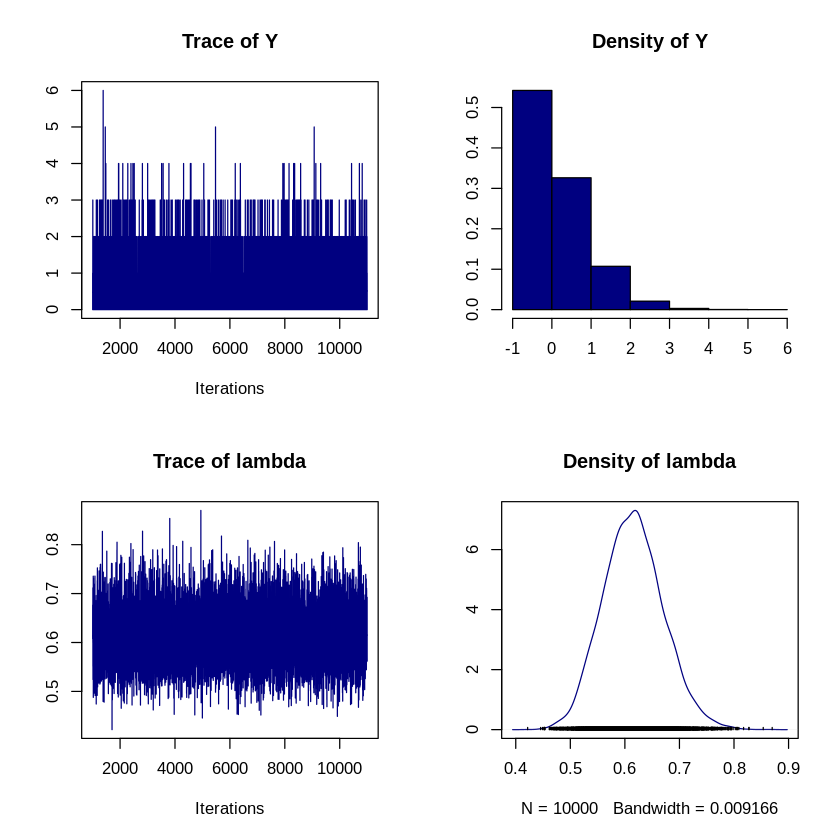

In [300]:
#plot and summaries for observation 1
mean_observation_1 <- 0.6154
variance_observation_1 <- 0.05517**2
median_observation_1 <- 0.6146

cat('Observation 1:', '\n')
cat('mean for observation 1: ', mean_observation_1, '\n')
cat('variance for observation 1: ', varianece_observation_1, '\n')
cat('Median for observation 1:', median_observation_1, '\n')

print(summary(chain_1))
plot(chain_1, col='navy')

Observation 2: 
mean for observation 1:  0.7035 
variance for observation 1:  0.002472078 
Median for observation 1: 0.7026 

Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

         Mean      SD  Naive SE Time-series SE
Y      0.7076 0.85544 0.0085544      0.0085544
lambda 0.7035 0.04972 0.0004972      0.0004972

2. Quantiles for each variable:

         2.5%    25%    50%    75%  97.5%
Y      0.0000 0.0000 1.0000 1.0000 3.0000
lambda 0.6103 0.6692 0.7026 0.7365 0.8035



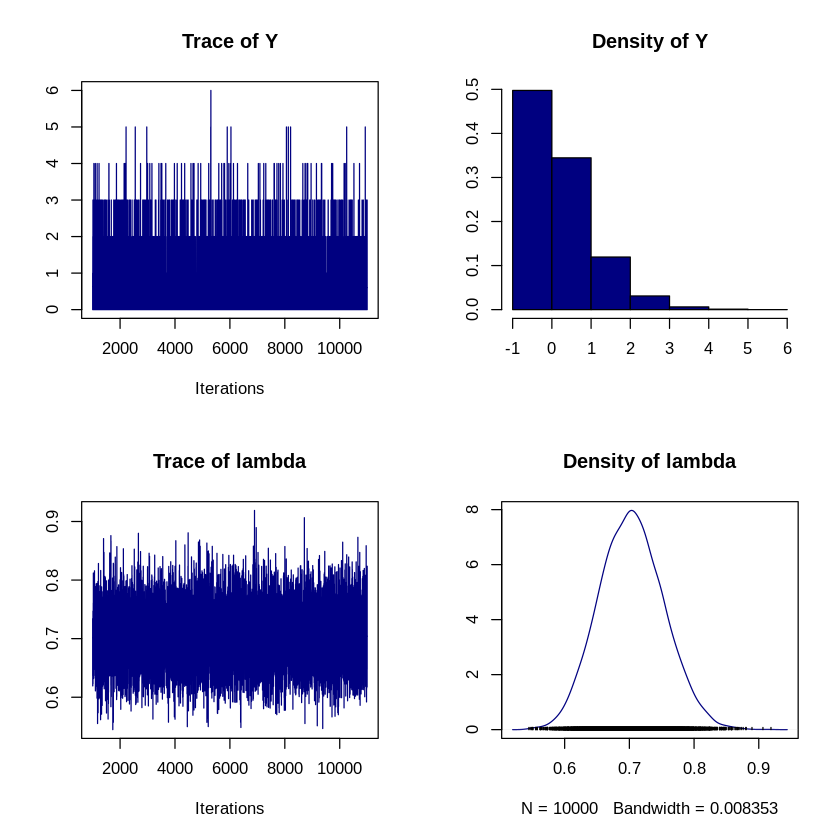

In [301]:
#plot and summaries for observation 2
mean_observation_2 <- 0.7035
variance_observation_2 <- 0.04972**2
median_observation_2 <- 0.7026

cat('Observation 2:', '\n')
cat('mean for observation 1: ', mean_observation_2, '\n')
cat('variance for observation 1: ', varianece_observation_2, '\n')
cat('Median for observation 1:', median_observation_2, '\n')

print(summary(chain_2))
plot(chain_2, col='navy')

#### For the calculation 95% interval the following link has been used: https://cran.r-project.org/doc/Rnews/Rnews_2006-1.pdf#page=7

,mean,variance,median,lower_bound_credibility_interval,upper_bound_credibility_interval
Observation 1,0.6154,0.003043729,0.6146,0.5138502,0.7289902
Observation 2,0.7035,0.002472078,0.7026,0.6102179,0.8035243


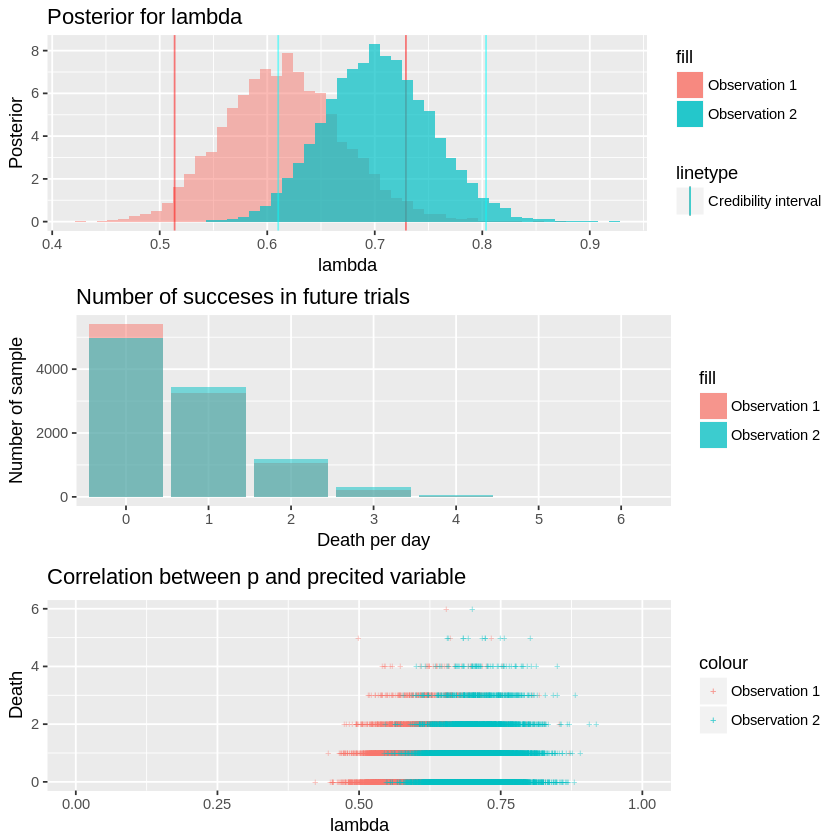

In [319]:
#format the chain
chain_1.df <- as.data.frame(as.mcmc(chain_1))
chain_2.df <- as.data.frame(as.mcmc(chain_2))

#95% credibility interval
sorted_chain_1 <- chain_1.df[order(chain_1.df$lambda),]$lambda
lower_bound_1_MCMC <- as.double(sorted_chain_1[250]) 
upper_bound_1_MCMC <- as.double(sorted_chain_1[9750])

sorted_chain_2 <- chain_2.df[order(chain_2.df$lambda),]$lambda
lower_bound_2_MCMC <- as.double(sorted_chain_2[250]) 
upper_bound_2_MCMC <- as.double(sorted_chain_2[9750])

results <- data.frame(
            mean=c(mean_observation_1, mean_observation_2),
            variance=c(variance_observation_1, variance_observation_2),
            median=c(median_observation_1, median_observation_2),
            lower_bound_credibility_interval = c(lower_bound_1_MCMC, lower_bound_2_MCMC),
            upper_bound_credibility_interval = c(upper_bound_1_MCMC, upper_bound_2_MCMC), 
            row.names = c('Observation 1', 'Observation 2')
            )
results

#p inference result 
ggplot()+
geom_histogram(aes(x=chain_1.df$lambda, y=..density.., fill='Observation 1'), alpha=0.5, bins=50)+
geom_vline(aes(xintercept=lower_bound_1_MCMC, linetype='Credibility interval'), color='red', alpha=0.5)+
geom_vline(aes(xintercept=upper_bound_1_MCMC, linetype='Credibility interval'), color='red', alpha=0.5)+
geom_histogram(aes(x=chain_2.df$lambda, y=..density.., fill='Observation 2'), alpha=0.7, bins=50)+
geom_vline(aes(xintercept=lower_bound_2_MCMC, linetype='Credibility interval'), color='cyan', alpha=0.5)+
geom_vline(aes(xintercept=upper_bound_2_MCMC, linetype='Credibility interval'), color='cyan', alpha=0.5)+
labs(x='lambda', y='Posterior'
     , title='Posterior for lambda') -> plot_inference_p

# next data prediction probability
ty_1 <- as.data.frame(table(chain_1.df$Y))
ty_2 <- as.data.frame(table(chain_2.df$Y))

ggplot()+
geom_bar(aes(x = ty_1$Var1, y=ty_1$Freq, fill='Observation 1'), alpha=0.5, stat = 'identity')+
geom_bar(aes(x = ty_2$Var1, y=ty_2$Freq, fill='Observation 2'), alpha=0.5, stat = 'identity')+
labs(x='Death per day', y='Number of sample', 
     title=sprintf('Number of succeses in future trials')) -> plot_next_data_prediction

#Correlation between p and predicted variable
ggplot()+
geom_point(aes(x=chain_1.df$lambda, y=chain_1.df$Y, color='Observation 1'), shape='+', size=2, alpha=0.5)+
geom_point(aes(x=chain_2.df$lambda, y=chain_2.df$Y, color='Observation 2'), shape='+', size=2, alpha=0.5)+
xlim(0, 1)+
labs(x='lambda', y='Death',
     title ='Correlation between p and precited variable') -> plot_correlations

grid.arrange(grobs=list(plot_inference_p, plot_next_data_prediction, plot_correlations), nrow=3)

#### (b) assuming now a Jeffreys’ prior, g(λ) ∝ 1/√λ , with λ > 0, compute and plot the posterior distribution for λ, the death rate over the measurement time. Determine the posterior mean, median and variance, and compute the 95% credibility interval.

In [331]:
#data
data_1 <- NULL
data_1$X <- n_1

data_2 <- NULL
data_2$X <- n_2


#create the jags model 
model <- 's11_inf_p_lambda_pred_Jeffrey.bug'
jm_1 <- jags.model(model, data_1)
jm_2 <- jags.model(model, data_2)

#update the Markov chain (burn-in) and plot
update(jm_1, 1000)
chain_1 <- coda.samples(jm_1, c('lambda','Y'), n.iter=10000)

update(jm_2, 1000)
chain_2 <- coda.samples(jm_2, c('lambda', 'Y'), n.iter=10000)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 200
   Unobserved stochastic nodes: 2
   Total graph size: 204

Initializing model

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 280
   Unobserved stochastic nodes: 2
   Total graph size: 284

Initializing model



Observation 1: 
mean for observation 1:  0.6107 
variance for observation 1:  0.003043729 
Median for observation 1: 0.6091 

Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

         Mean      SD  Naive SE Time-series SE
Y      0.6185 0.78856 0.0078856      0.0078856
lambda 0.6107 0.05512 0.0005512      0.0005416

2. Quantiles for each variable:

         2.5%    25%    50%   75%  97.5%
Y      0.0000 0.0000 0.0000 1.000 2.0000
lambda 0.5053 0.5726 0.6091 0.648 0.7215



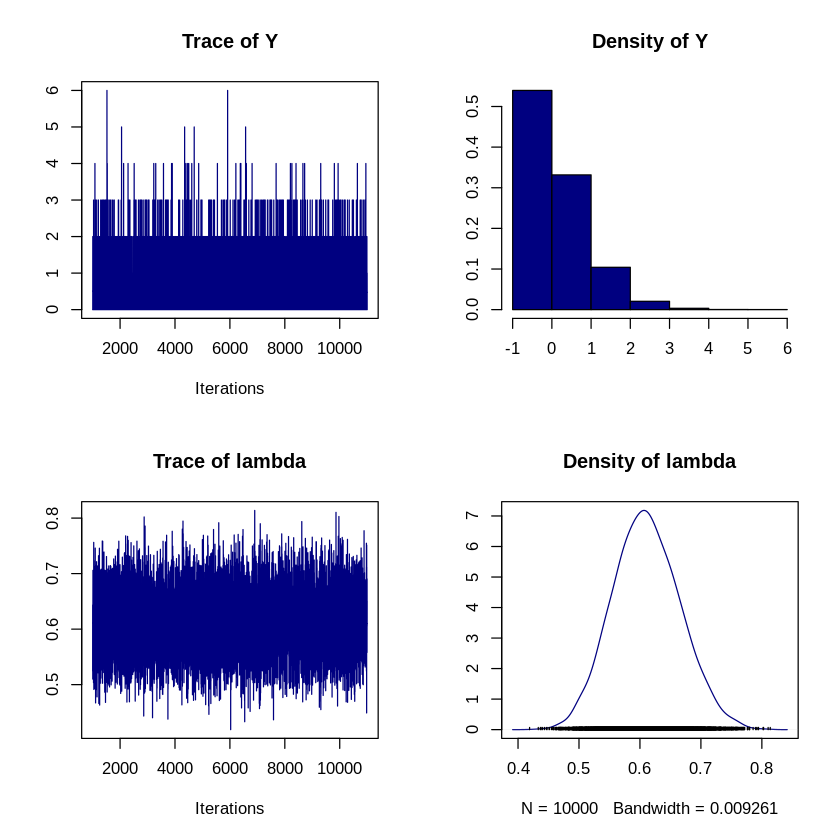

In [334]:
#plot and summaries for observation 1
mean_observation_1 <- 0.6107
variance_observation_1 <- 0.05512**2
median_observation_1 <- 0.6091

cat('Observation 1:', '\n')
cat('mean for observation 1: ', mean_observation_1, '\n')
cat('variance for observation 1: ', varianece_observation_1, '\n')
cat('Median for observation 1:', median_observation_1, '\n')

print(summary(chain_1))
plot(chain_1, col='navy')

Observation 2: 
mean for observation 1:  0.6991 
variance for observation 1:  0.002472078 
Median for observation 1: 0.6986 

Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

         Mean      SD  Naive SE Time-series SE
Y      0.6964 0.83660 0.0083660      0.0083660
lambda 0.6991 0.04966 0.0004966      0.0004966

2. Quantiles for each variable:

         2.5%    25%    50%   75%  97.5%
Y      0.0000 0.0000 0.0000 1.000 3.0000
lambda 0.6059 0.6651 0.6986 0.732 0.7967



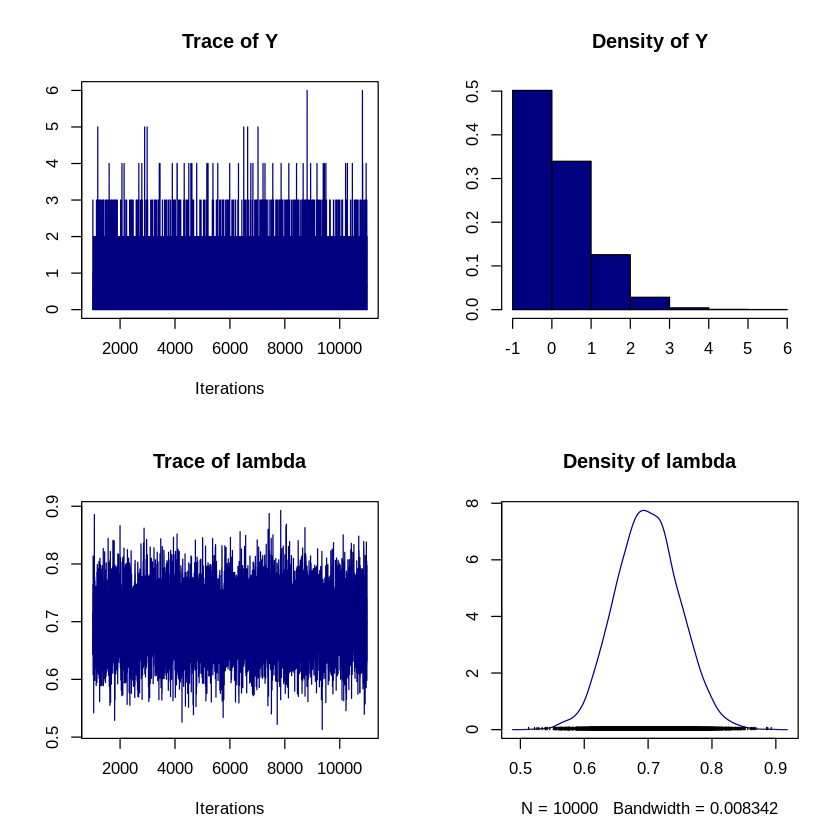

In [336]:
#plot and summaries for observation 2
mean_observation_2 <- 0.6991
variance_observation_2 <- 0.04966**2
median_observation_2 <- 0.6986

cat('Observation 2:', '\n')
cat('mean for observation 1: ', mean_observation_2, '\n')
cat('variance for observation 1: ', varianece_observation_2, '\n')
cat('Median for observation 1:', median_observation_2, '\n')

print(summary(chain_2))
plot(chain_2, col='navy')

#### For the calculation 95% interval the following link has been used: https://cran.r-project.org/doc/Rnews/Rnews_2006-1.pdf#page=7

,mean,variance,median,lower_bound_credibility_interval,upper_bound_credibility_interval
Observation 1,0.6107,0.003038214,0.6091,0.5052925,0.7214508
Observation 2,0.6991,0.002466116,0.6986,0.6057783,0.7967016


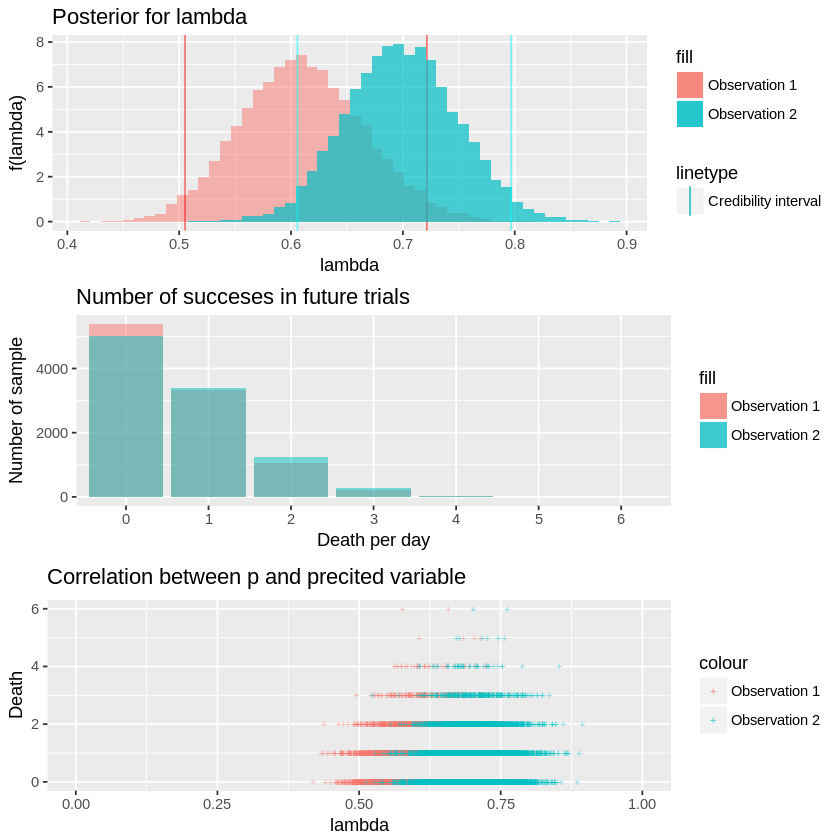

In [337]:
#format the chain
chain_1.df <- as.data.frame(as.mcmc(chain_1))
chain_2.df <- as.data.frame(as.mcmc(chain_2))

#95% credibility interval
sorted_chain_1 <- chain_1.df[order(chain_1.df$lambda),]$lambda
lower_bound_1_MCMC <- as.double(sorted_chain_1[250]) 
upper_bound_1_MCMC <- as.double(sorted_chain_1[9750])

sorted_chain_2 <- chain_2.df[order(chain_2.df$lambda),]$lambda
lower_bound_2_MCMC <- as.double(sorted_chain_2[250]) 
upper_bound_2_MCMC <- as.double(sorted_chain_2[9750])

results <- data.frame(
            mean=c(mean_observation_1, mean_observation_2),
            variance=c(variance_observation_1, variance_observation_2),
            median=c(median_observation_1, median_observation_2),
            lower_bound_credibility_interval = c(lower_bound_1_MCMC, lower_bound_2_MCMC),
            upper_bound_credibility_interval = c(upper_bound_1_MCMC, upper_bound_2_MCMC), 
            row.names = c('Observation 1', 'Observation 2')
            )
results

#p inference result 
ggplot()+
geom_histogram(aes(x=chain_1.df$lambda, y=..density.., fill='Observation 1'), alpha=0.5, bins=50)+
geom_vline(aes(xintercept=lower_bound_1_MCMC, linetype='Credibility interval'), color='red', alpha=0.5)+
geom_vline(aes(xintercept=upper_bound_1_MCMC, linetype='Credibility interval'), color='red', alpha=0.5)+
geom_histogram(aes(x=chain_2.df$lambda, y=..density.., fill='Observation 2'), alpha=0.7, bins=50)+
geom_vline(aes(xintercept=lower_bound_2_MCMC, linetype='Credibility interval'), color='cyan', alpha=0.5)+
geom_vline(aes(xintercept=upper_bound_2_MCMC, linetype='Credibility interval'), color='cyan', alpha=0.5)+
labs(x='lambda', y='f(lambda)'
     , title='Posterior for lambda') -> plot_inference_p

# next data prediction probability
ty_1 <- as.data.frame(table(chain_1.df$Y))
ty_2 <- as.data.frame(table(chain_2.df$Y))

ggplot()+
geom_bar(aes(x = ty_1$Var1, y=ty_1$Freq, fill='Observation 1'), alpha=0.5, stat = 'identity')+
geom_bar(aes(x = ty_2$Var1, y=ty_2$Freq, fill='Observation 2'), alpha=0.5, stat = 'identity')+
labs(x='Death per day', y='Number of sample', 
     title=sprintf('Number of succeses in future trials')) -> plot_next_data_prediction

#Correlation between p and predicted variable
ggplot()+
geom_point(aes(x=chain_1.df$lambda, y=chain_1.df$Y, color='Observation 1'), shape='+', size=2, alpha=0.5)+
geom_point(aes(x=chain_2.df$lambda, y=chain_2.df$Y, color='Observation 2'), shape='+', size=2, alpha=0.5)+
xlim(0, 1)+
labs(x='lambda', y='Death',
     title ='Correlation between p and precited variable') -> plot_correlations

grid.arrange(grobs=list(plot_inference_p, plot_next_data_prediction, plot_correlations), nrow=3)

# Ex. 3

In [2]:
n <- 116 #total of sample
y <- 11 #high level of bacteria 

#### (a) find the frequentist estimator for p

In [3]:
p_freq <- 11/116 

cat('the frequenties estimator is:', p_freq)

the frequenties estimator is: 0.09482759

#### (b) using a Beta(1, 10) prior for p, calculate and plot posterior distribution P (p∣ y)

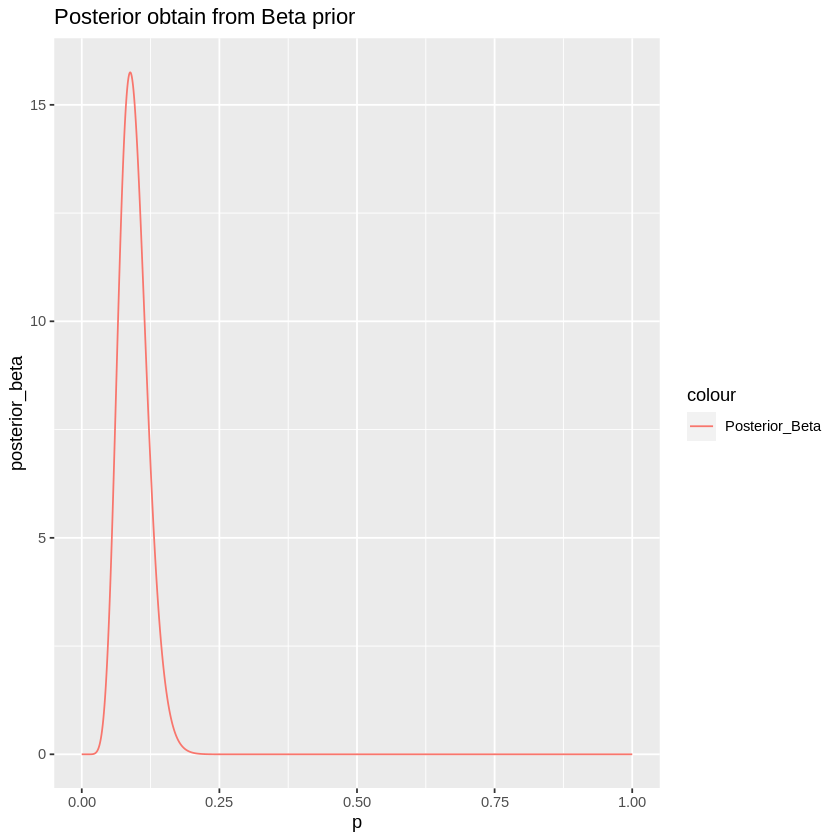

In [4]:
#p and interval
delta.t <- 0.0001
p <- seq(0, 1, by = delta.t) 

#likelihood, Prior
p.like_Beta <- dbinom(y, size=n, prob=p)
p.prior_Beta <- dbeta(p, 1, 10)

#Posterior
p.star_posterior_Beta <- p.like_Beta * p.prior_Beta #mnon normalize Posterior
p.posterior_Beta <- p.star_posterior_Beta/(delta.t * sum(p.star_posterior_Beta)) #normalize posterior

#Plot
ggplot() +
geom_line(aes(x=p, y=p.posterior_Beta, color='Posterior_Beta')) +
labs(x='p', y='posterior_beta', title='Posterior obtain from Beta prior')-> plot_posterior_Beta
plot_posterior_Beta

#### (c) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval

mean,variance,lower_bound_credibility_interval,upperr_bound_credibility_interval
<dbl>,<dbl>,<dbl>,<dbl>
0.09448819,0.0006684388,0.0467,0.1459


Warning message:
“Removed 8000 rows containing missing values (`geom_line()`).”


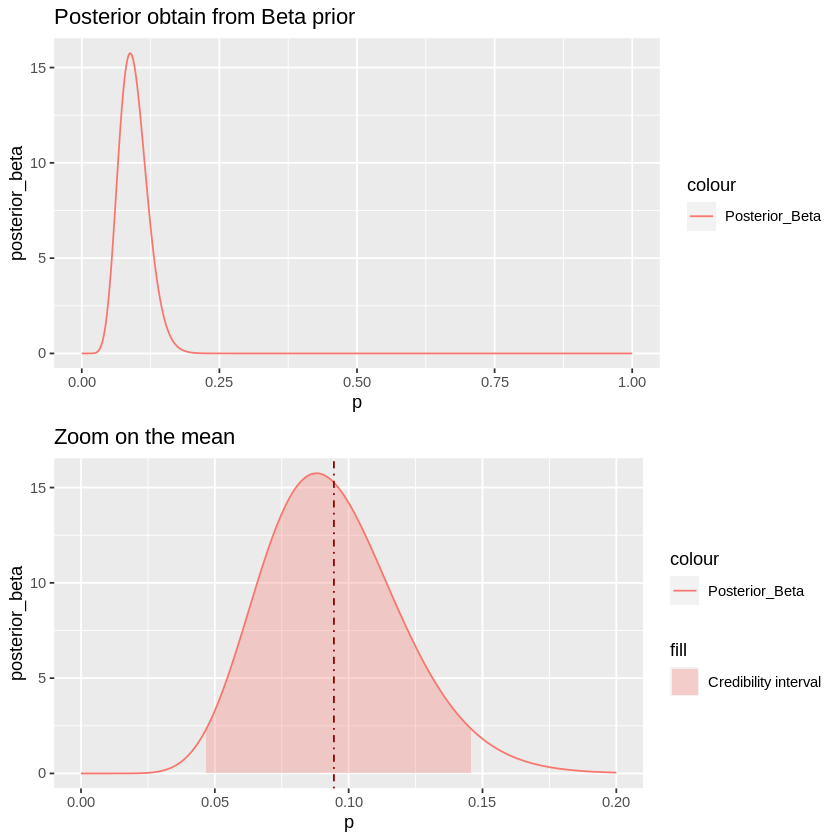

In [5]:
# bayesian estimator for p 
mean_Beta <- (sum(p.posterior_Beta * p)) * delta.t
variance_Beta <- sum(((mean_Beta - p)^2) *p.posterior_Beta) * delta.t
lower_Beta <- ncredint(p, p.posterior_Beta, level=0.95)[['lower']]
upper_Beta <- ncredint(p, p.posterior_Beta, level=0.95)[['upper']]

result_beta <- tibble(
                mean = mean_Beta,
                variance = variance_Beta,
                lower_bound_credibility_interval = lower_Beta,
                upperr_bound_credibility_interval = upper_Beta
                )
result_beta

#plot
plot_posterior_Beta + 
geom_area(aes(x = p[p>lower_Beta & p<upper_Beta],
              y = p.posterior_Beta[p>lower_Beta & p<upper_Beta],   
              fill='Credibility interval'), alpha=0.3) +
geom_vline(aes(xintercept = mean_Beta), color='darkRed', linetype="dotdash") +
xlim(0, 0.2) +
labs(title='Zoom on the mean') -> plot_posterior_Beta_zoom

grid.arrange(grobs=list(plot_posterior_Beta, plot_posterior_Beta_zoom), nrow=2)

#### (d) test the hypotesis p = p_0, with p_0 = 0.1

#### bayesian approach

Is p = 0.1 inside the 95% credibility interval? TRUE , so I accept the null Hypotesis H_0 and refuse H_1.

Warning message:
“Removed 541 rows containing non-finite values (`stat_align()`).”
Warning message:
“Removed 9551 rows containing missing values (`geom_line()`).”


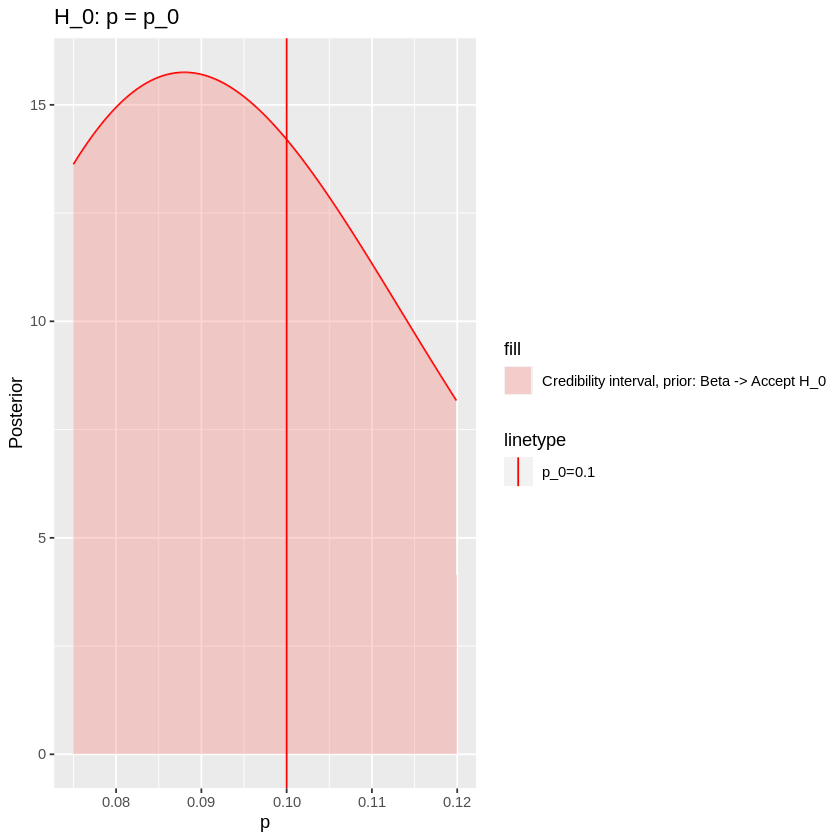

In [6]:
p_0 <- 0.1
cat('Is p = 0.1 inside the 95% credibility interval?', p_0 > lower_Beta & p_0 < upper_Beta,', so I accept the null Hypotesis H_0 and refuse H_1.')

ggplot()+
geom_line(aes(p, p.posterior_Beta), color='red') +
geom_area(aes(x = p[p>lower_Beta & p<upper_Beta],
              y = p.posterior_Beta[p>lower_Beta & p<upper_Beta],   
              fill='Credibility interval, prior: Beta -> Accept H_0'), alpha=0.3) +
xlim(0.075, 0.12) + 
labs(y = 'Posterior', title='H_0: p = p_0') +
geom_vline(aes(xintercept=0.1, linetype='p_0=0.1'), color='red') -> plot_HT
plot_HT

#### frequentist approach

In [7]:
n <- 116 #total of sample
y <- 11 #high level of bacteria 
alpha=0.05
x <- seq(0, n, 1)
x.freq <- pbinom(x, size=n, prob = p_0)

lower_limit <- max(x[x.freq <= alpha/2])
upper_limit <- min(x[x.freq >= 1-alpha/2])

alpha.limit = x.freq[lower_limit] + 1 - x.freq[upper_limit]
cat('The closest can get to alpha=0.05 is:', alpha.limit, '\n')
cat('The limits are:', '[', lower_limit, ',', upper_limit,']', '\n')
cat('Our number of succesful event = ', y, ' falls into the limits range, we cannot reject the null hypotesis H_0')

The closest can get to alpha=0.05 is: 0.04761008 
The limits are: [ 5 , 18 ] 
Our number of succesful event =  11  falls into the limits range, we cannot reject the null hypotesis H_0

#### A new mesumerent, performed one month later on n=165 water samples, gives y=9 high bacter X level

#### (e) find the frequentist estimator for p

In [8]:
y <- 9
n <- 165

p_freq <- y/n
cat('The frequentiest estimator for p is:', p_freq)

The frequentiest estimator for p is: 0.05454545

#### (f) find a bayesian estimator for p, assuming both a Beta(1, 10) prior for p, and assuming the posterior probability of the older measurement as the prior for the new one. 
#### (g)  95% credibility interval

,Mean,Variance,Lower_bound_credibility_interval,Upper_bound_credibility_interval
,<dbl>,<dbl>,<dbl>,<dbl>
Prior: Beta,0.05681818,0.0003027677,0.0251,0.0914
Prior: Old posterior,0.07191781,0.0002278008,0.0436,0.1019


Warning message:
“Removed 7500 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 7500 rows containing missing values (`geom_line()`).”


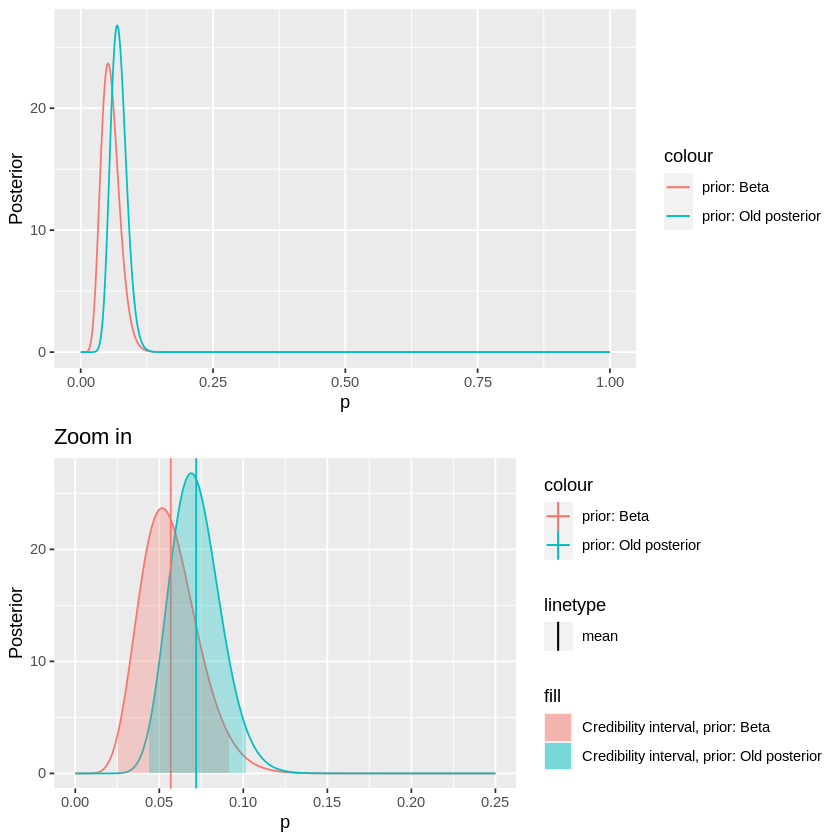

In [9]:
delta.t <- 0.0001
p <- seq(0,1, by=delta.t)

#likelihood
p.like <- dbinom(y, n, prob=p)

#the two prior
p.prior_beta <- dbeta(p, 1, 10)
p.prior_old <- p.posterior_Beta

#the two possible posterior 
p.post_star_beta <- p.like * p.prior_beta #non normalized posterior
p.post_beta <- p.post_star_beta / (delta.t * sum(p.post_star_beta))

p.post_star_old <- p.like * p.prior_old #non normalized posterior
p.post_old <- p.post_star_old / (delta.t * sum(p.post_star_old))

#find the two baiesian estimator for the two posterior 
mean_beta <- sum(p * p.post_beta) * delta.t
variance_beta <- sum(((p-mean_beta)^2) * p.post_beta) * delta.t
lower_beta <- ncredint(p, p.post_beta, level = 0.95)[['lower']]
upper_beta <- ncredint(p, p.post_beta, level = 0.95)[['upper']]
credibility_interval_beta <- c(lower_Beta, upper_Beta)


mean_old <- sum(p * p.post_old) * delta.t
variance_old <- sum(((p-mean_old)^2) * p.post_old) * delta.t
lower_old <- ncredint(p, p.post_old, level=0.95)[['lower']]
upper_old <- ncredint(p, p.post_old, level=0.95)[['upper']]
credibility_interval_old <- c(lower_old, upper_old) 

#print the result in a dataframe
result <- data.frame(
          Mean = c(mean_beta, mean_old),
          Variance = c(variance_beta, variance_old),
          Lower_bound_credibility_interval = c(lower_beta, lower_old),
          Upper_bound_credibility_interval = c(upper_beta, upper_old),
          row.names = c('Prior: Beta', 'Prior: Old posterior')
)
result

#plot the two posterior 
ggplot()+
geom_line(aes(p, p.post_beta, color='prior: Beta')) +
geom_line(aes(p, p.post_old, color='prior: Old posterior')) +
labs(x='p', y='Posterior') -> plot_two_prior

plot_two_prior +
geom_vline(aes(xintercept=mean_beta, color = 'prior: Beta', linetype='mean')) + 
geom_area(aes(x = p[p>lower_beta & p<upper_beta],
              y = p.post_beta[p>lower_beta & p<upper_beta],   
              fill='Credibility interval, prior: Beta'), alpha=0.3) +

geom_vline(aes(xintercept=mean_old, color='prior: Old posterior', linetype='mean')) +
geom_area(aes(x = p[p>lower_old & p<upper_old],
              y = p.post_old[p>lower_old & p<upper_old],   
              fill='Credibility interval, prior: Old posterior'), alpha=0.3) +
xlim(0, 0.25) + 
labs(title='Zoom in') -> plot_two_prior_zoom

grid.arrange(grobs=list(plot_two_prior, plot_two_prior_zoom), nrow=2)


#### (h) test the hypotesis at $\alpha$=5%

#### frequentist approach

In [10]:
n <- 165
y <- 9
alpha=0.05
x <- seq(0, n, 1)
x.freq <- pbinom(x, size=n, prob = p_0)

lower_limit <- max(x[x.freq <= alpha/2])
upper_limit <- min(x[x.freq >= 1-alpha/2])

alpha.limit = x.freq[lower_limit] + 1 - x.freq[upper_limit]
cat('The closest can get to alpha=0.05 is:', alpha.limit, '\n')
cat('The limits are:', '[', lower_limit, ',', upper_limit,']', '\n')
cat('Our number of succesful event = ', y, ' falls into the limits range, we cannot reject the null hypotesis H_0.', '\n')
cat('It is important to notice that our measurement barely fall inside the confidence intervall')

The closest can get to alpha=0.05 is: 0.04532508 
The limits are: [ 8 , 24 ] 
Our number of succesful event =  9  falls into the limits range, we cannot reject the null hypotesis H_0. 
It is important to notice that our measurement barely fall inside the confidence intervall

#### bayesian approach

Is p = 0.1 inside the credibility interval for the posterior opatined with the Beta prior? FALSE so we reject the null hypotesis 
Is p = 0.1 inside the credibility interval for the posterior opatined with the old posterior as prior? TRUE so we accept the null hypotesis

Warning message:
“Removed 313 rows containing non-finite values (`stat_align()`).”
Warning message:
“Removed 498 rows containing non-finite values (`stat_align()`).”
Warning message:
“Removed 9551 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 9551 rows containing missing values (`geom_line()`).”


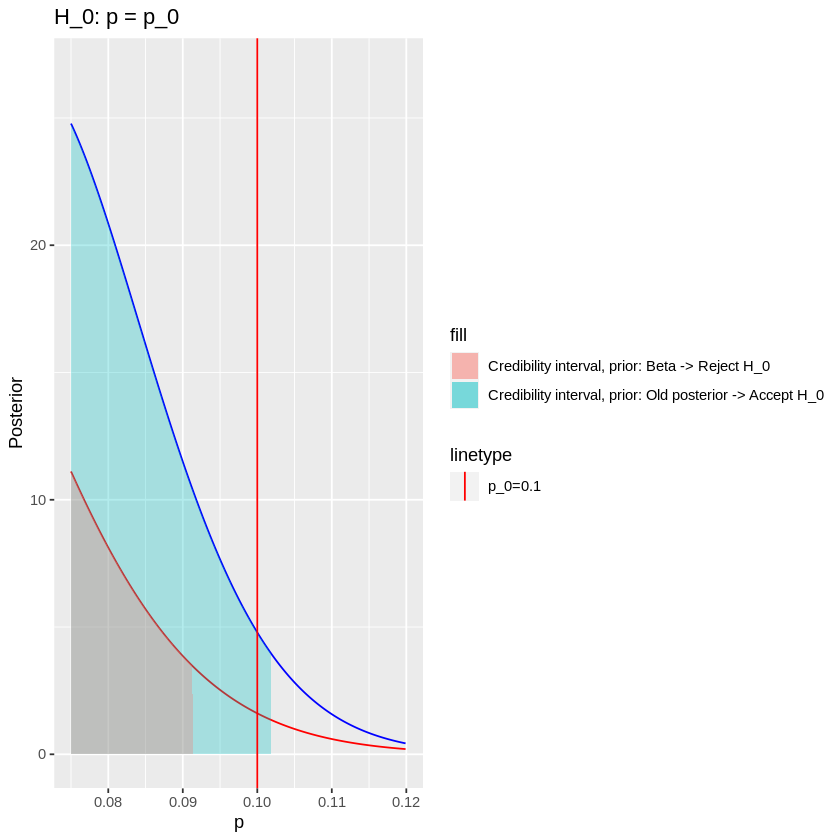

In [11]:
p_0 <- 0.1

cat('Is p = 0.1 inside the credibility interval for the posterior opatined with the Beta prior?', 
   p_0 > lower_beta & p_0 < upper_beta, 'so we reject the null hypotesis', '\n')
cat('Is p = 0.1 inside the credibility interval for the posterior opatined with the old posterior as prior?', 
   p_0 > lower_old & p_0 < upper_old, 'so we accept the null hypotesis')

ggplot()+
geom_line(aes(p, p.post_beta), color='red') +
geom_line(aes(p, p.post_old), , color='blue') +
geom_area(aes(x = p[p>lower_old & p<upper_old],
              y = p.post_old[p>lower_old & p<upper_old],   
              fill='Credibility interval, prior: Old posterior -> Accept H_0'), alpha=0.3) +
geom_area(aes(x = p[p>lower_beta & p<upper_beta],
              y = p.post_beta[p>lower_beta & p<upper_beta],   
              fill='Credibility interval, prior: Beta -> Reject H_0'), alpha=0.3) +
xlim(0.075, 0.12) + 
labs(y = 'Posterior', title='H_0: p = p_0') +
geom_vline(aes(xintercept=0.1, linetype='p_0=0.1'), color='red') -> plot_twoprior_HT
plot_twoprior_HT

# Ex. 4

#### (b) Using a Beta(1, 10) posterior distribution P(p|y), calculate and plot posterior distribution P(p|y)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 1
   Unobserved stochastic nodes: 2
   Total graph size: 7

Initializing model


Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

     Mean     SD Naive SE Time-series SE
Y 0.95750 0.9587 0.009587       0.009587
p 0.09472 0.0261 0.000261       0.000261

2. Quantiles for each variable:

     2.5%     25%     50%    75%  97.5%
Y 0.00000 0.00000 1.00000 1.0000 3.0000
p 0.05045 0.07609 0.09276 0.1107 0.1528



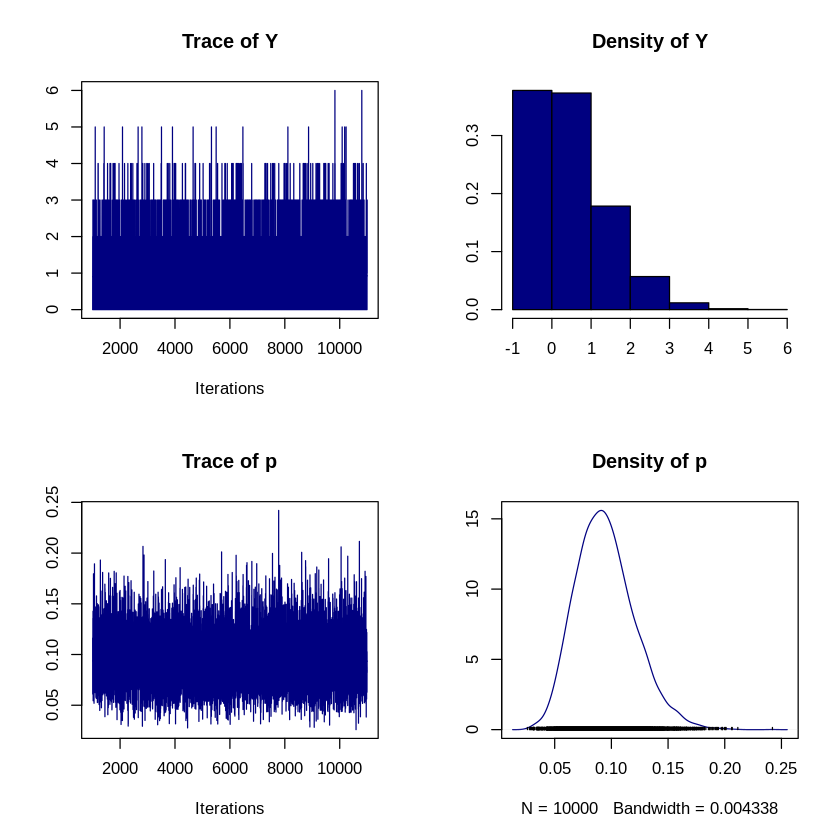

In [339]:
#define data and model
data <- NULL
data$X <- 11
data$n <- 116
data$n_next <- 10

model <- 's11_inf_p_pred.bug'
jm <- jags.model(model, data)

#update the chain
update(jm, 1000)
chain <- coda.samples(jm, c('p', 'Y'), n.iter = 10000)
print(summary(chain))

#plot the chain
plot(chain, col='navy')

Correlation matrix:          Y         p
Y 1.0000000 0.2782879
p 0.2782879 1.0000000


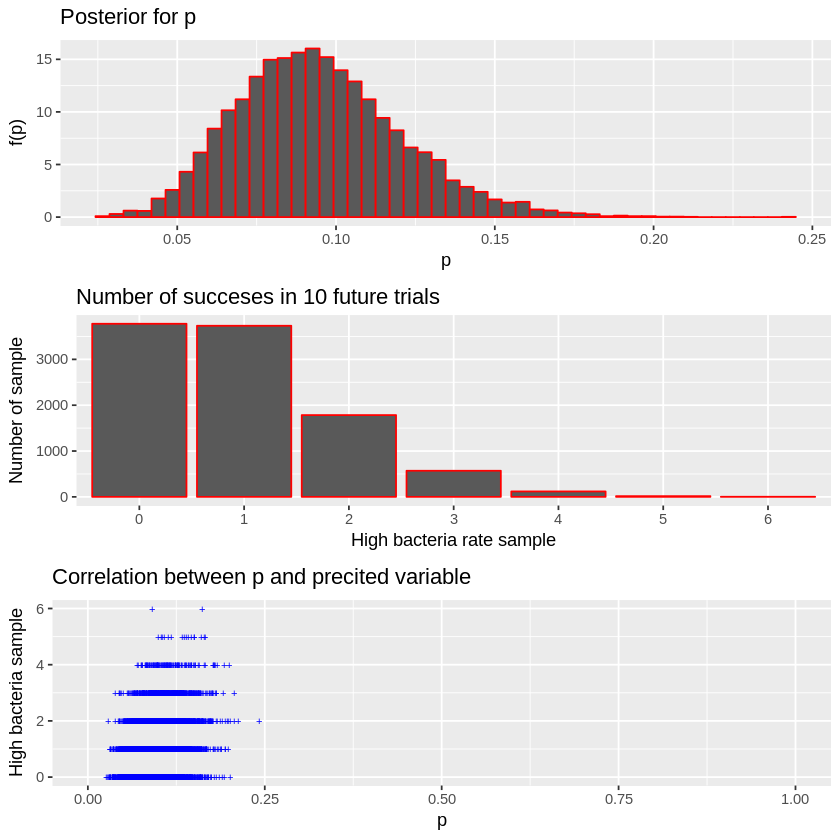

In [340]:
chain.df <- as.data.frame( as.mcmc(chain) )
cat(sprintf('Correlation matrix:'))
print(cor(chain.df))

#p inference result 
ggplot()+
geom_histogram(aes(x=chain.df$p, y=..density..), color='red', bins=50)+
labs(x='p', y='f(p)', title='Posterior for p') -> plot_inference_p

# next data prediction probability
ty <- as.data.frame(table(chain.df$Y))
ggplot()+
geom_bar(aes(x = ty$Var1, y=ty$Freq), color='red', stat = 'identity')+
labs(x='High bacteria rate sample', y='Number of sample', 
     title=sprintf('Number of succeses in %d future trials', data$n_next)) -> plot_next_data_prediction

#Correlation between p and predicted variable
ggplot(data=chain.df)+
geom_point(aes(x=p, y=Y), shape='+', size=2, color='blue')+
xlim(0, 1)+
labs(x='p', y='High bacteria sample', title ='Correlation between p and precited variable') -> plot_correlations

grid.arrange(grobs=list(plot_inference_p, plot_next_data_prediction, plot_correlations), nrow=3)

Confronting with the Posterior obtained in Ex.3

Warning message:
“Removed 6 rows containing non-finite values (stat_bin).”Warning message:
“Removed 8000 rows containing missing values (geom_path).”

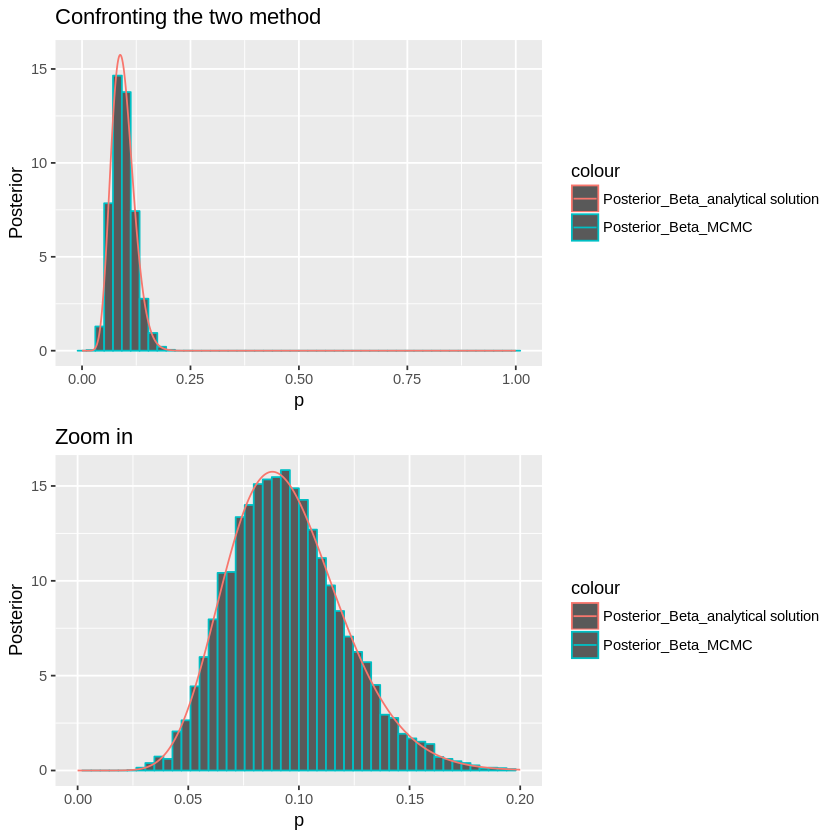

In [341]:
ggplot()+
geom_histogram(aes(x=chain.df$p, y=..density.., color='Posterior_Beta_MCMC'),  bins=50)+
geom_line(aes(x=p, y=p.posterior_Beta, color='Posterior_Beta_analytical solution'))+
labs(x='p', y='Posterior', title='Confronting the two method') -> plot_confrot_methods

plot_confrot_methods +
xlim(0, 0.2) +
labs(title='Zoom in')-> plot_confrot_methods_zoom

grid.arrange(grobs=list(plot_confrot_methods, plot_confrot_methods_zoom), nrow=2)

#### (c) find the bayesian estimator p, posterior mean and variance, and a 95% credibility interval

In [342]:
summary(chain)


Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

     Mean     SD Naive SE Time-series SE
Y 0.95750 0.9587 0.009587       0.009587
p 0.09472 0.0261 0.000261       0.000261

2. Quantiles for each variable:

     2.5%     25%     50%    75%  97.5%
Y 0.00000 0.00000 1.00000 1.0000 3.0000
p 0.05045 0.07609 0.09276 0.1107 0.1528


#### For the solution of the 95% interval the following link has been used: https://cran.r-project.org/doc/Rnews/Rnews_2006-1.pdf#page=7

mean,variance,lower_bound_credibility_interval,upper_bound_credibility_interval
0.09472,0.00068121,0.05043589,0.1528467


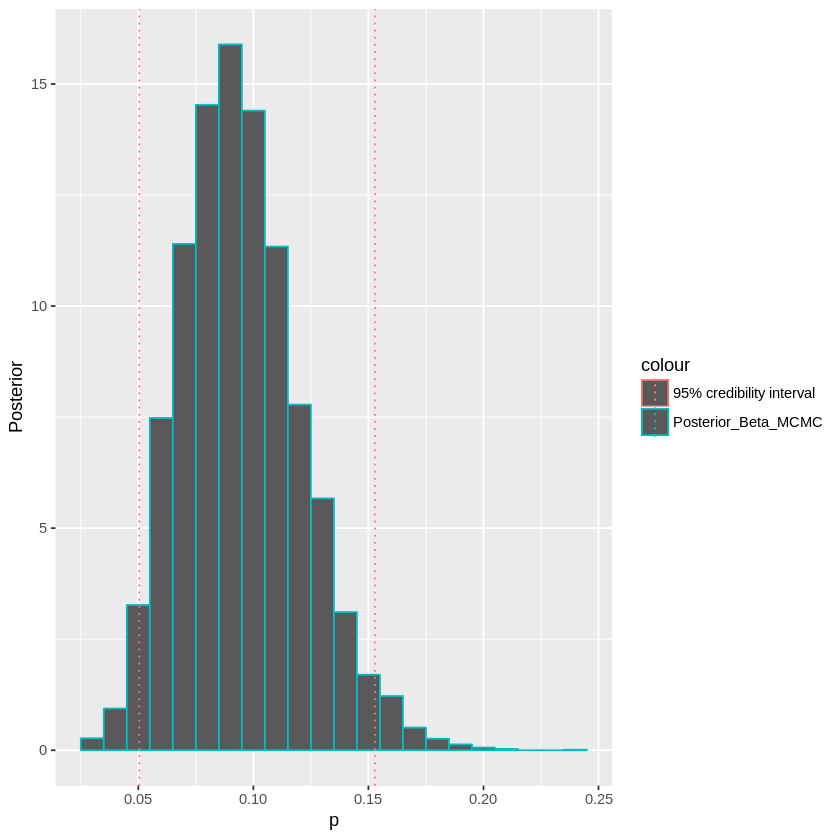

In [348]:
mean_MCMC <- 0.09472
variance_MCMC <- (0.0261)^2

sorted_chain <- chain.df[order(chain.df$p),]$p
lower_bound_MCMC <- as.double(sorted_chain[250]) 
upper_bound_MCMC <- as.double(sorted_chain[9750])

result <- data.frame(
                    mean = mean_MCMC,
                    variance = variance_MCMC,
                    lower_bound_credibility_interval = lower_bound_MCMC,
                    upper_bound_credibility_interval = upper_bound_MCMC
)
result

ggplot()+
geom_histogram(aes(x=chain.df$p, y=..density.., color='Posterior_Beta_MCMC'), binwidth = 0.01)+
geom_vline(aes(xintercept=lower_bound_MCMC, color='95% credibility interval'), linetype='dotted')+
geom_vline(aes(xintercept=upper_bound_MCMC, color='95% credibility interval'), linetype='dotted') +
labs(x='p', y='Posterior')